**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [36]:
# imports and sets magics
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy.optimize import root
from scipy.optimize import minimize_scalar, root
import pandas as pd
%run Problem1.py

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [37]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

We define parametres and functions that will be used all throughaóut problem 1

To check for market clearing conditions, we check for all the prices if the markets clear

In [38]:
# Grid for p1 and p2
p1_grid = np.linspace(0.1, 2.0, 10)
p2_grid = np.linspace(0.1, 2.0, 10)

# Check market clearing conditions
for p1 in p1_grid:
    for p2 in p2_grid:
        # Optimal firm behavior
        l1_star = optimal_labor(w, p1, par.A, par.gamma)
        y1_star = optimal_output(l1_star, par.A, par.gamma)
        pi1_star = optimal_profit(w, p1, par.A, par.gamma)
        
        l2_star = optimal_labor(w, p2, par.A, par.gamma)
        y2_star = optimal_output(l2_star, par.A, par.gamma)
        pi2_star = optimal_profit(w, p2, par.A, par.gamma)

        # Optimal consumer behavior
        l_consumer = optimal_labor_consumer(w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, par.nu, par.epsilon)
        c1_star = consumption_1(w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, l_consumer)
        c2_star = consumption_2(w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, l_consumer)

        # Market clearing conditions
        labor_market_clearing = np.isclose(l_consumer, l1_star + l2_star)
        good1_market_clearing = np.isclose(c1_star, y1_star)
        good2_market_clearing = np.isclose(c2_star, y2_star)

        print(f'p1 = {p1:.1f}, p2 = {p2:.1f}')
        print(f'Labor market clearing: {labor_market_clearing}')
        print(f'Good 1 market clearing: {good1_market_clearing}')
        print(f'Good 2 market clearing: {good2_market_clearing}')
        print('---')


p1 = 0.1, p2 = 0.1
Labor market clearing: False
Good 1 market clearing: False
Good 2 market clearing: False
---
p1 = 0.1, p2 = 0.3
Labor market clearing: False
Good 1 market clearing: False
Good 2 market clearing: False
---
p1 = 0.1, p2 = 0.5
Labor market clearing: False
Good 1 market clearing: False
Good 2 market clearing: False
---
p1 = 0.1, p2 = 0.7
Labor market clearing: False
Good 1 market clearing: False
Good 2 market clearing: False
---
p1 = 0.1, p2 = 0.9
Labor market clearing: False
Good 1 market clearing: False
Good 2 market clearing: False
---
p1 = 0.1, p2 = 1.2
Labor market clearing: False
Good 1 market clearing: False
Good 2 market clearing: False
---
p1 = 0.1, p2 = 1.4
Labor market clearing: False
Good 1 market clearing: False
Good 2 market clearing: False
---
p1 = 0.1, p2 = 1.6
Labor market clearing: False
Good 1 market clearing: False
Good 2 market clearing: False
---
p1 = 0.1, p2 = 1.8
Labor market clearing: False
Good 1 market clearing: False
Good 2 market clearing: Fa

**Interpretation:** As seen above, none of the markets clear, implying that we need to leverage another method to find the equilibrium prices. This is done below in question 2. 

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

`Step 1:` We define the market clearing functions

In [39]:
# Define the market clearing functions
def good1_market_clearing(p, w, par):
    p1, p2 = p
    l1_star = optimal_labor(w, p1, par.A, par.gamma)
    y1_star = optimal_output(l1_star, par.A, par.gamma)
    pi1_star = optimal_profit(w, p1, par.A, par.gamma)
    l2_star = optimal_labor(w, p2, par.A, par.gamma)
    y2_star = optimal_output(l2_star, par.A, par.gamma)
    pi2_star = optimal_profit(w, p2, par.A, par.gamma)
    l_consumer = optimal_labor_consumer(w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, par.nu, par.epsilon)
    c1_star = consumption_1(w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, l_consumer)
    return c1_star - y1_star

def good2_market_clearing(p, w, par):
    p1, p2 = p
    l1_star = optimal_labor(w, p1, par.A, par.gamma)
    y1_star = optimal_output(l1_star, par.A, par.gamma)
    pi1_star = optimal_profit(w, p1, par.A, par.gamma)
    l2_star = optimal_labor(w, p2, par.A, par.gamma)
    y2_star = optimal_output(l2_star, par.A, par.gamma)
    pi2_star = optimal_profit(w, p2, par.A, par.gamma)
    l_consumer = optimal_labor_consumer(w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, par.nu, par.epsilon)
    c2_star = consumption_2(w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, l_consumer)
    return c2_star - y2_star


`Step 2:` Solve for the Equilibrium Prices: We will use the root function from scipy.optimize to solve for $p_1$ and $p_2$  that satisfy the market clearing conditions.

In [40]:
# Combined market clearing function
def market_clearing_conditions(p, w, par):
    return [good1_market_clearing(p, w, par), good2_market_clearing(p, w, par)]

# Initial guess for prices
initial_guess = [1.0, 1.0]

# Solve for equilibrium prices
equilibrium = root(market_clearing_conditions, initial_guess, args=(w, par))

# Extract equilibrium prices
p1_eq, p2_eq = equilibrium.x
print(f'Equilibrium prices: p1 = {p1_eq:.2f}, p2 = {p2_eq:.2f}')


Equilibrium prices: p1 = 0.98, p2 = 1.49


**Interpretation:** Given Walras' law, we know that the other markets clear when we have cleared 2 markets. Moreover, the equilibrium `price for Good 1 is 0.98` and the `price for Good 2 is 1.49`

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [41]:
# Optimize tau to maximize the social welfare function
result = minimize_scalar(objective, bounds=(0, 1), method='bounded', args=(w, p1_eq, p2_eq, par.alpha, par.nu, par.epsilon, par.kappa))
tau_opt = result.x

# Calculate the implied T with the optimal tau
pi1_star = optimal_profit(w, p1_eq, par.A, par.gamma)
pi2_star = optimal_profit(w, p2_eq, par.A, par.gamma)
l_opt = optimal_labor_consumer(w, 0, pi1_star, pi2_star, p1_eq, p2_eq, tau_opt, par.alpha, par.nu, par.epsilon)
c2_star = consumption_2(w, 0, pi1_star, pi2_star, p1_eq, p2_eq, tau_opt, par.alpha, l_opt)
T_opt = tau_opt * c2_star

print(f'Optimal tau: {tau_opt:.4f}')
print(f'Implied T: {T_opt:.4f}')


Optimal tau: 0.0000
Implied T: 0.0000


**Interpretation:** The optimization found that setting the tax rate
$\tau$ to zero maximizes social welfare, implying no redistribution is optimal. This result suggests that the costs of taxation (represented by $\kappa$) outweigh potential benefits. Consequently, both 
$\tau$ and the implied transfer $T$ are zero, reflecting a preference for free-market outcomes without government intervention in this model. 

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


- We simulate the utility of different career choices with variability introduced by random noise. We hereafter import NumPy for numerical operations, then define utility values for three careers, set the number of simulations to 10,000, and specify a noise standard deviation of 2. We generate random noise for each career and simulation, add this noise to the utility values, and calculate the resulting utilities. Finally, we compute and print the expected and average realized utilities across all simulations.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace


# Constants
v = [1, 2, 3]  # Values for each career
K = 10000  # Number of simulations
sigma = 2  # Standard deviation of the noise

# Generate random noise for each career and simulation
epsilon = np.random.normal(0, sigma, (K, len(v)))

# Calculate utility for each simulation and career
utilities = v + epsilon

# Calculate expected utility (mean across simulations) and average realized utility
expected_utility = np.mean(utilities, axis=0)
average_realized_utility = np.mean(utilities, axis=0)


print(f'The expected utility is: {expected_utility}')

print(f'The average realized utility is: {average_realized_utility}')

The expected utility is: [0.96116284 2.00592819 2.99719962]
The average realized utility is: [0.96116284 2.00592819 2.99719962]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

**Interpretation**: The average realized utilities are the same as the expected utilities since the noise 
$\epsilon$ averages out to zero across many draws. Each value aligns closely with the corresponding constant 
$v_j$ for each career due to the law of large numbers, showing that the noise contributes little to the long-term average.

- This code simulates career choices and utilities for a group of graduates, introducing variability with random noise. We begin by defining the number of careers (J = 3), the number of graduates (N = 10), the number of simulations (K = 10,000), the noise standard deviation (sigma = 2), and the intrinsic utilities for each career (v = 1, 2, 3). We then create arrays to store the results of career choices, expected utilities, and realized utilities for each graduate.

- In the simulation loop, for each graduate, we determine the number of friends, Fi, and generate utility values for each career by adding noise to the intrinsic utilities. We identify the career chosen most frequently across simulations, record the share of graduates choosing each career, calculate the expected utility for each graduate, and compute the realized utility based on the chosen careers

- Finally, we plot the share of each career choice by graduate, the average expected utility for each graduate, and the average realized utility for each graduate. This provides a detailed simulation of career choice dynamics and visualizes the results to highlight the patterns in expected and realized utilities.

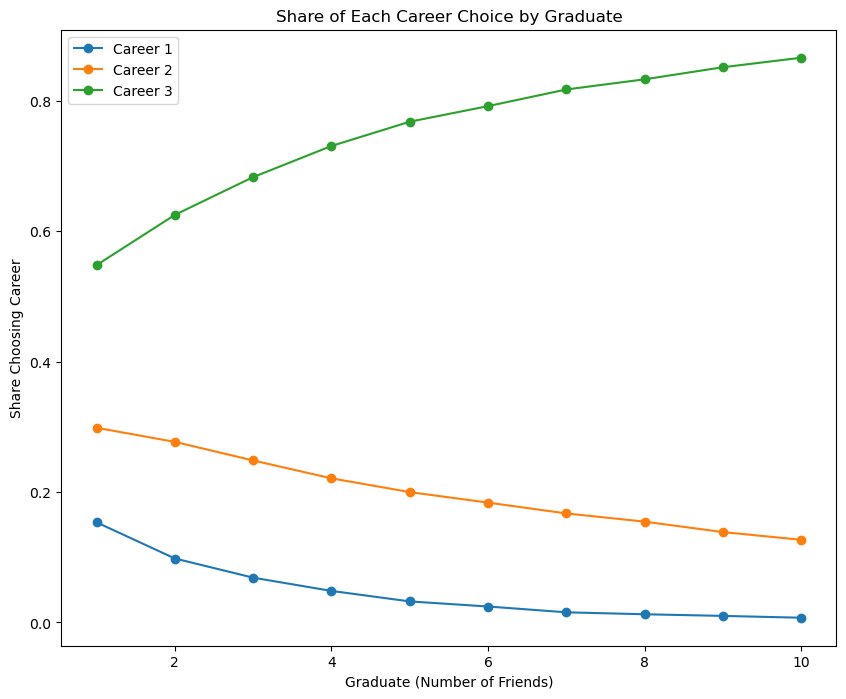

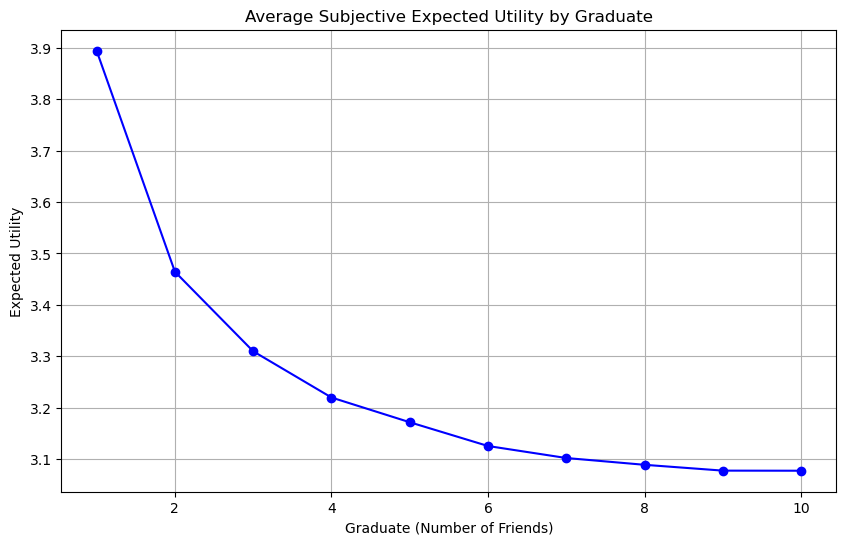

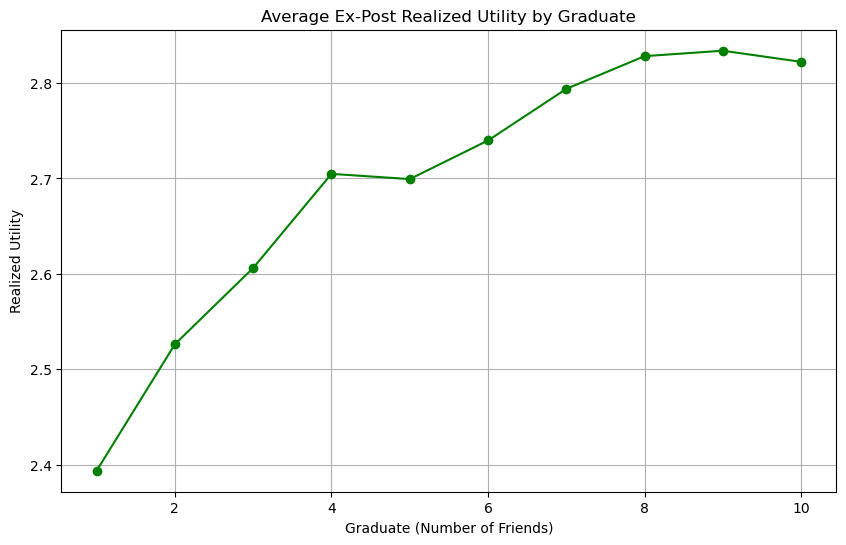

In [43]:
from career_simulation import CareerSimulation

# Create an instance of the CareerSimulation class
sim = CareerSimulation()

# Run the simulation
sim.simulate()

# Plotting the results
sim.plot_results()

**Interpretation**: Career 3 (green line) is the most popular, with its share increasing as the number of friends increases. Conversely, Career 1 (blue line) and Career 2 (orange line) show a decreasing trend in their shares as the number of friends grows, with Career 1 being the least chosen overall. This indicates a strong preference for Career 3 among graduates with more friends.

The second graph shows a decreasing trend in the average subjective expected utility as the number of friends increases, an increasing trend in average ex-post realized utility with the number of friends, peaking around 8 friends before slightly decreasing.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

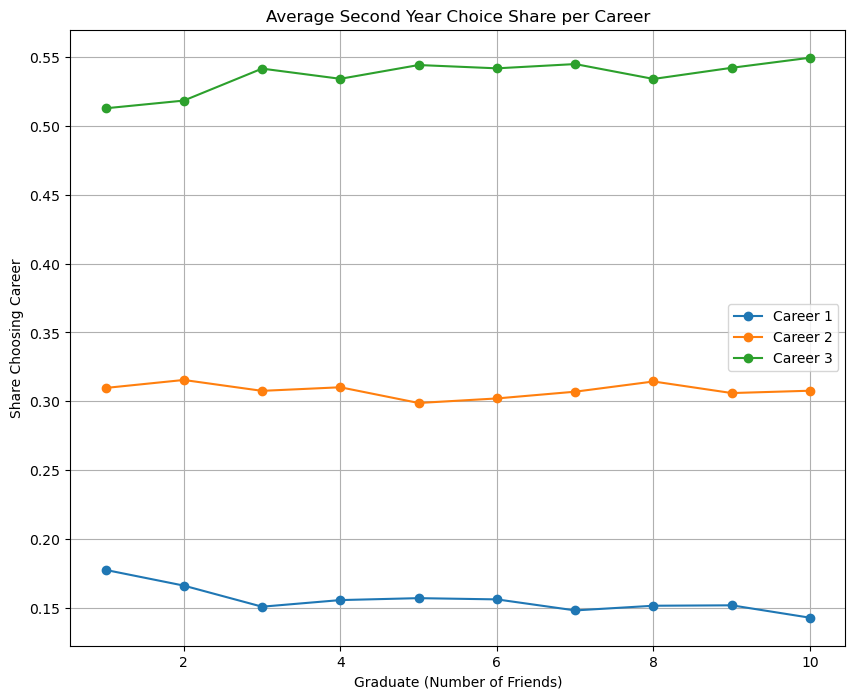

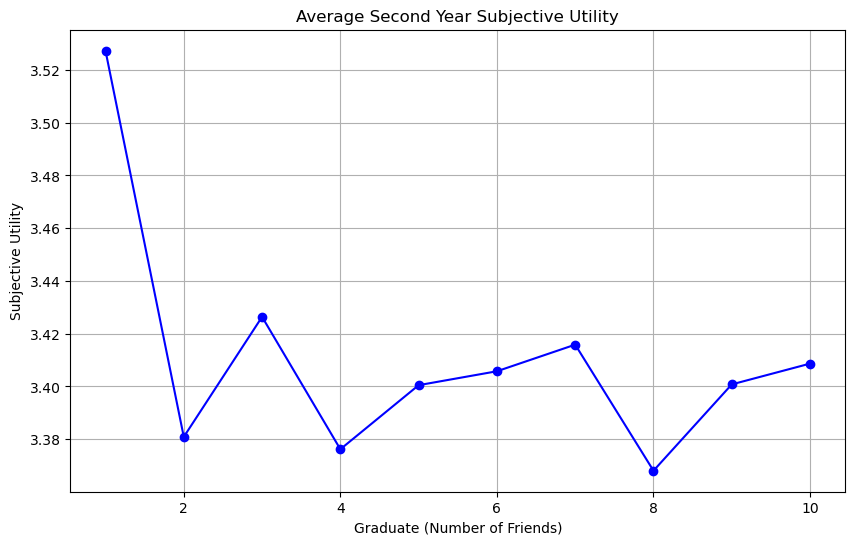

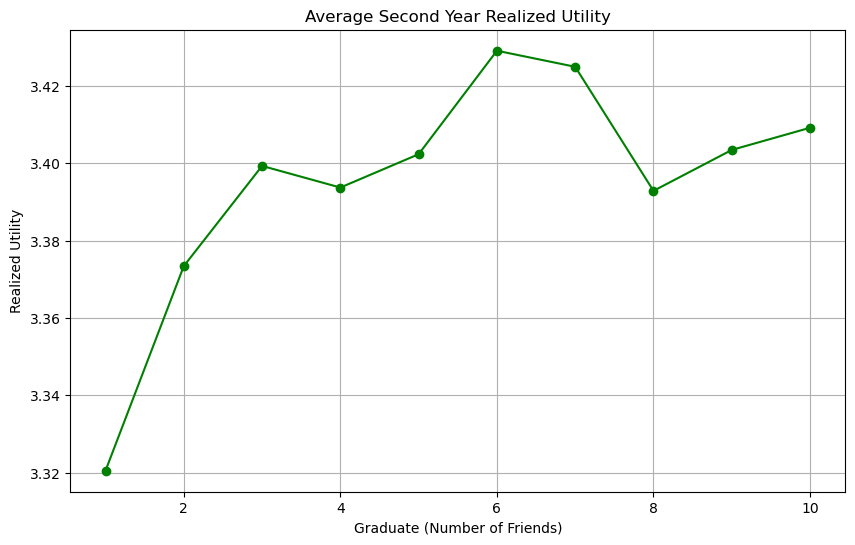

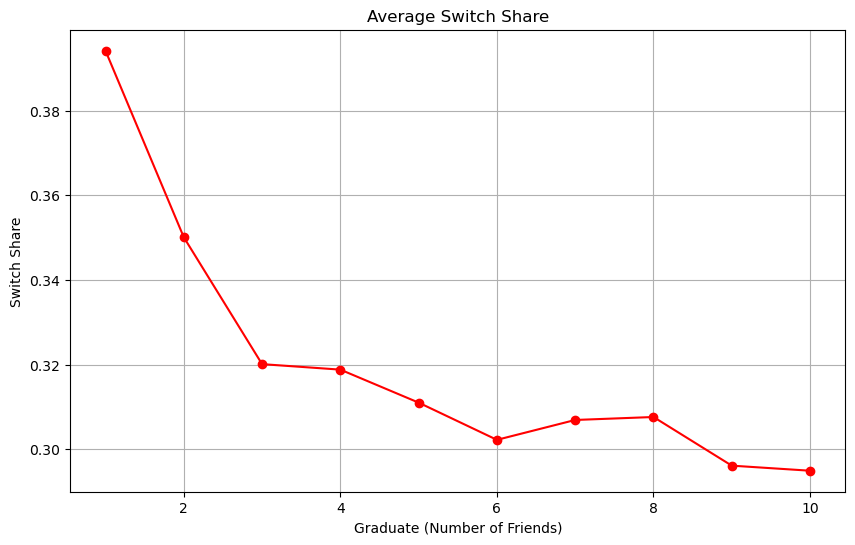

In [44]:
# We had trouble using the former simulation, and therefor contructed two new ones
# Setting the parameters for the simulation
par = SimpleNamespace()
par.J = 3  # Number of careers
par.N = 10  # Number of graduates
par.K = 10000  # Number of simulations
par.sigma = 2  # Standard deviation of noise
par.v = np.array([1, 2, 3])  # Intrinsic utility values of the careers
par.c = 1  # Switching cost

# Simulation arrays
choices = np.zeros((par.N, par.J, par.K))
subjective_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Simulate for each graduate i
for i in range(par.N):
    F_i = i + 1  # Number of friends graduate i has in each career
    for k in range(par.K):
        # Simulate noise for friends and the individual
        epsilon_friends = np.random.normal(0, par.sigma, (F_i, par.J))
        epsilon_individual = np.random.normal(0, par.sigma, par.J)
        
        # Calculate the prior expected utility from friends
        friend_utilities = par.v + epsilon_friends.mean(axis=0)
        
        # Calculate total expected utility for the graduate
        total_expected_utility = friend_utilities + epsilon_individual
        
        # Determine choice (career with highest utility)
        choice = np.argmax(total_expected_utility)
        
        # Record the choice
        choices[i, choice, k] = 1
        
        # Record the subjective and realized utilities
        subjective_utilities[i, k] = friend_utilities[choice]
        realized_utilities[i, k] = par.v[choice] + epsilon_individual[choice]

# Calculating the average outcomes
average_choices = choices.mean(axis=2)
average_subjective_utilities = subjective_utilities.mean(axis=1)
average_realized_utilities = realized_utilities.mean(axis=1)

# Simulation arrays for the second year
second_year_choices = np.zeros((par.N, par.J, par.K))
second_year_subjective_utilities = np.zeros((par.N, par.K))
second_year_realized_utilities = np.zeros((par.N, par.K))
switch_counts = np.zeros((par.N, par.K))

# Simulate for each graduate i for the second year
for i in range(par.N):
    F_i = i + 1  # Number of friends is same as the graduate number
    for k in range(par.K):
        # Retrieve the first year's choice
        first_year_choice = np.argmax(choices[i, :, k])
        
        # Simulate noise for friends and the individual for the second year
        epsilon_friends_second = np.random.normal(0, par.sigma, (F_i, par.J))
        epsilon_individual_second = np.random.normal(0, par.sigma, par.J)
        
        # Calculate new priors for switching
        friend_utilities_second = par.v + epsilon_friends_second.mean(axis=0)
        new_priors = np.where(np.arange(par.J) != first_year_choice, 
                              friend_utilities_second - par.c, 
                              realized_utilities[i, k])
        
        # Calculate total expected utility for the graduate in the second year
        total_expected_utility_second = new_priors + epsilon_individual_second
        
        # Determine second year choice (career with highest utility)
        second_choice = np.argmax(total_expected_utility_second)
        
        # Record the choice
        second_year_choices[i, second_choice, k] = 1
        
        # Record if there was a switch
        if second_choice != first_year_choice:
            switch_counts[i, k] = 1
        
        # Record the subjective and realized utilities
        second_year_subjective_utilities[i, k] = new_priors[second_choice]
        second_year_realized_utilities[i, k] = par.v[second_choice] + epsilon_individual_second[second_choice]

# Calculating the average outcomes for the second year
average_second_year_choices = second_year_choices.mean(axis=2)
average_second_year_subjective_utilities = second_year_subjective_utilities.mean(axis=1)
average_second_year_realized_utilities = second_year_realized_utilities.mean(axis=1)
average_switches = switch_counts.mean(axis=1)

# Plotting Average Second Year Choice Share per Career
fig, ax = plt.subplots(figsize=(10, 8))
for j in range(average_second_year_choices.shape[1]):
    ax.plot(range(1, average_second_year_choices.shape[0] + 1), average_second_year_choices[:, j], label=f'Career {j+1}', marker='o')
ax.set_xlabel('Graduate (Number of Friends)')
ax.set_ylabel('Share Choosing Career')
ax.set_title('Average Second Year Choice Share per Career')
ax.legend()
ax.grid(True)
plt.show()

# Plotting Average Second Year Subjective Utility
plt.figure(figsize=(10, 6))
plt.plot(range(1, average_second_year_subjective_utilities.shape[0] + 1), average_second_year_subjective_utilities, marker='o', color='blue')
plt.title('Average Second Year Subjective Utility')
plt.xlabel('Graduate (Number of Friends)')
plt.ylabel('Subjective Utility')
plt.grid(True)
plt.show()

# Plotting Average Second Year Realized Utility
plt.figure(figsize=(10, 6))
plt.plot(range(1, average_second_year_realized_utilities.shape[0] + 1), average_second_year_realized_utilities, marker='o', color='green')
plt.title('Average Second Year Realized Utility')
plt.xlabel('Graduate (Number of Friends)')
plt.ylabel('Realized Utility')
plt.grid(True)
plt.show()

# Plotting Average Switch Share
plt.figure(figsize=(10, 6))
plt.plot(range(1, average_switches.shape[0] + 1), average_switches, marker='o', color='red')
plt.title('Average Switch Share')
plt.xlabel('Graduate (Number of Friends)')
plt.ylabel('Switch Share')
plt.grid(True)
plt.show()




**Interpretation**: The first three grpahs shows the same overall trend as in question 1. The last graph shows a general decline in the average switch share as the graduate number increases.

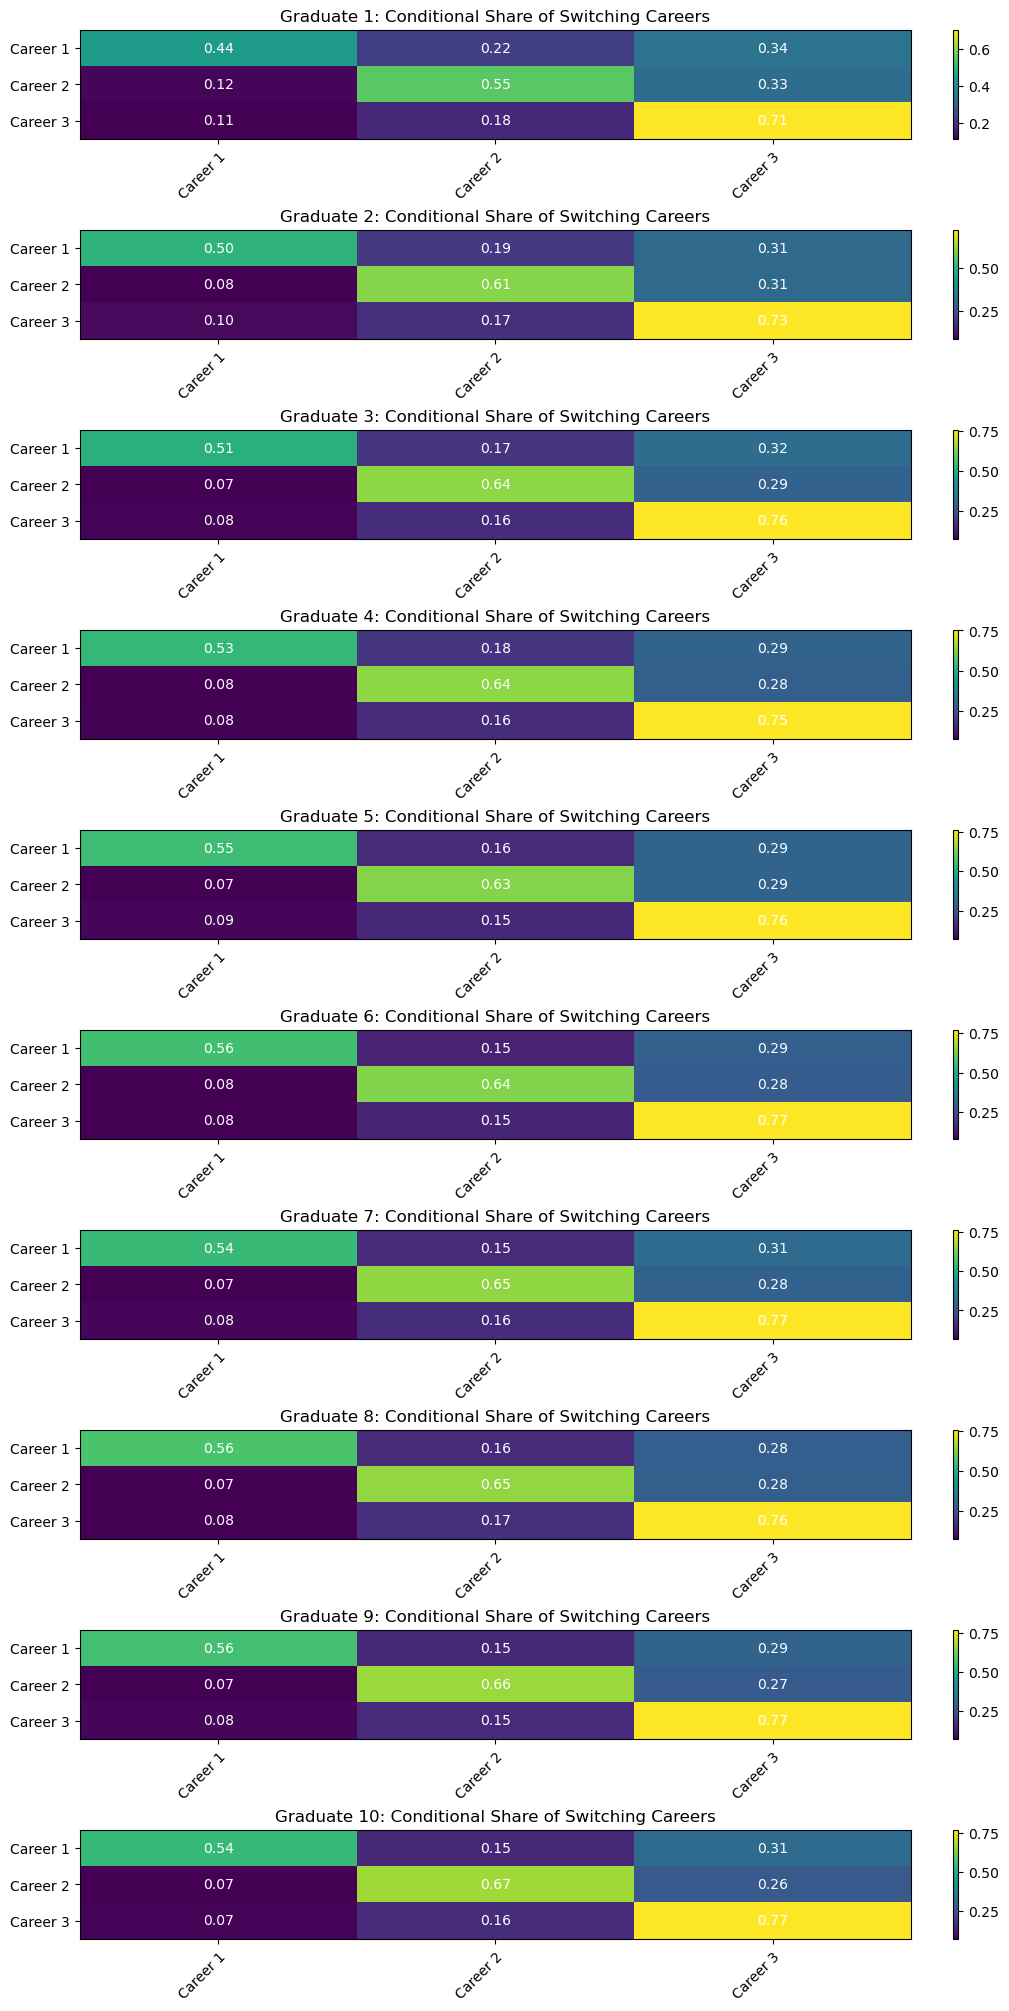

In [45]:

# Create a figure with subplots for each graduate
fig, axs = plt.subplots(nrows=par.N, figsize=(10, 2 * par.N), constrained_layout=True)

# Loop through each graduate to calculate and plot their conditional switching shares
for i in range(par.N):
    switch_shares_conditional_i = np.zeros((par.J, par.J))  # Initialize the matrix for this graduate
    total_initial_i = np.zeros(par.J)  # Total grads who chose each career initially

    # Count the initial choices and switches for graduate i
    for j_initial in range(par.J):
        initial_mask_i = choices[i, j_initial, :] == 1  # Initial choices of graduate i for career j_initial
        total_initial_i[j_initial] = initial_mask_i.sum()  # Total number of times i chose j_initial
        for j_second in range(par.J):
            switches_to_second_i = (second_year_choices[i, j_second, :] == 1) & initial_mask_i
            switch_shares_conditional_i[j_initial, j_second] = switches_to_second_i.sum()  # Count switches

    # Normalize the counts to get probabilities
    for j_initial in range(par.J):
        if total_initial_i[j_initial] > 0:
            switch_shares_conditional_i[j_initial, :] /= total_initial_i[j_initial]

    # Plot for this graduate
    ax = axs[i] if par.N > 1 else axs
    im = ax.imshow(switch_shares_conditional_i, cmap='viridis', interpolation='none', aspect='auto')
    ax.set_xticks(np.arange(par.J))
    ax.set_yticks(np.arange(par.J))
    ax.set_xticklabels([f"Career {j+1}" for j in range(par.J)])
    ax.set_yticklabels([f"Career {j+1}" for j in range(par.J)])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Add text annotations
    for j_initial in range(par.J):
        for j_second in range(par.J):
            ax.text(j_second, j_initial, f"{switch_shares_conditional_i[j_initial, j_second]:.2f}",
                    ha="center", va="center", color="w")

    ax.set_title(f"Graduate {i+1}: Conditional Share of Switching Careers")
    fig.colorbar(im, ax=ax)

plt.show()

OBS: First year choice in on the x-axis, and second year choices in the y-axis

**Interpretation**: Retention Tendency: All careers show a tendency for graduates to stay rather than switch, with Career 3 having the highest retention rate. This suggests that graduates might be highly satisfied with Career 3 or find it more advantageous compared to the others.

Switching Dynamics: The switching behavior indicates that Careers 2 and 3 are more attractive alternatives than Career 1, given the relatively higher percentages of switches to these careers from Career 1.


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [46]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

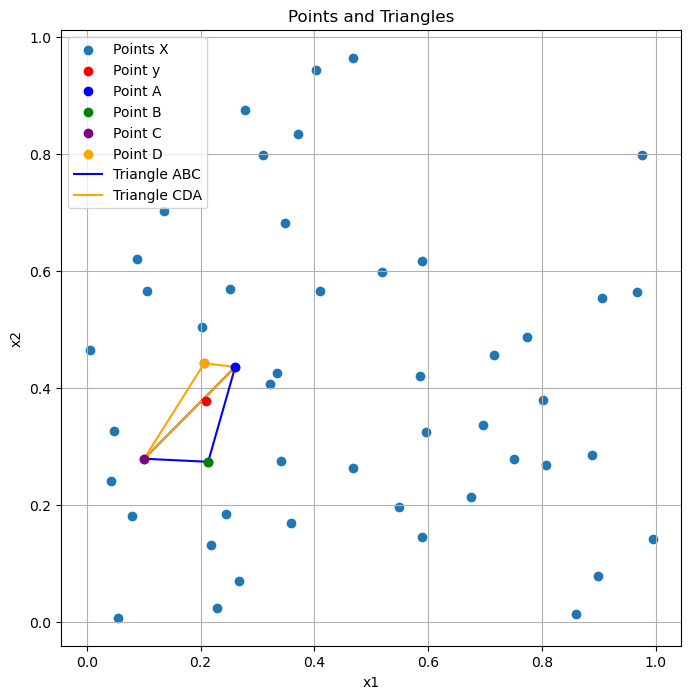

{'A:': array([0.26071605, 0.43635845]),
 'B:': array([0.21315735, 0.274245  ]),
 'C:': array([0.10056103, 0.27951775]),
 'D': array([0.20634391, 0.44272557])}

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Sample points and y
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Function to find points A, B, C, D
def find_points(X, y):
    A = min([x for x in X if x[0] > y[0] and x[1] > y[1]], key=lambda x: np.linalg.norm(x - y), default=None)
    B = min([x for x in X if x[0] > y[0] and x[1] < y[1]], key=lambda x: np.linalg.norm(x - y), default=None)
    C = min([x for x in X if x[0] < y[0] and x[1] < y[1]], key=lambda x: np.linalg.norm(x - y), default=None)
    D = min([x for x in X if x[0] < y[0] and x[1] > y[1]], key=lambda x: np.linalg.norm(x - y), default=None)
    return A, B, C, D

# Finding the points A, B, C, D
A, B, C, D = find_points(X, y)

# Plot the points and triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='Points X')
plt.scatter(*y, color='red', label='Point y', zorder=5)
if A is not None: plt.scatter(*A, color='blue', label='Point A', zorder=5)
if B is not None: plt.scatter(*B, color='green', label='Point B', zorder=5)
if C is not None: plt.scatter(*C, color='purple', label='Point C', zorder=5)
if D is not None: plt.scatter(*D, color='orange', label='Point D', zorder=5)

# Draw the triangles
if A is not None and B is not None and C is not None:
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='blue', label='Triangle ABC')
if C is not None and D is not None and A is not None:
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='orange', label='Triangle CDA')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points and Triangles')
plt.grid(True)
plt.show()

coordinates = {
    "A:": A,
    "B:": B,
    "C:": C,
    "D": D,
}

coordinates

The coordinates for the points A, B, C and D are found and the points and triangles are illustrated above.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [48]:

# Function to compute barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    if denom == 0:
        return float('inf'), float('inf'), float('inf')
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Sample data and function
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Finding unique points for the triangles
def find_unique_point(X, y, condition):
    distances = np.linalg.norm(X - y, axis=1)
    distances[~condition] = np.inf
    return X[np.argmin(distances)]

condition_A = (X[:, 0] > y[0]) & (X[:, 1] > y[1])
condition_B = (X[:, 0] > y[0]) & (X[:, 1] < y[1])
condition_C = (X[:, 0] < y[0]) & (X[:, 1] < y[1])
condition_D = (X[:, 0] < y[0]) & (X[:, 1] > y[1])

A = find_unique_point(X, y, condition_A)
B = find_unique_point(X, y, condition_B)
C = find_unique_point(X, y, condition_C)
D = find_unique_point(X, y, condition_D)

# Compute barycentric coordinates for triangles ABC and CDA
r_ABC = barycentric_coordinates(y, A, B, C)
r_CDA = barycentric_coordinates(y, C, D, A)

# Determine which triangle y is inside
inside_ABC = all(0 <= r <= 1 for r in r_ABC)
inside_CDA = all(0 <= r <= 1 for r in r_CDA)

results = {
    "Barycentric coordinates for y with respect to triangle ABC": r_ABC,
    "Barycentric coordinates for y with respect to triangle CDA": r_CDA,
    "Is y inside triangle ABC": inside_ABC,
    "Is y inside triangle CDA": inside_CDA
}

results


{'Barycentric coordinates for y with respect to triangle ABC': (0.6286263152916166,
  0.06910145494351515,
  0.3022722297648682),
 'Barycentric coordinates for y with respect to triangle CDA': (0.3682598757102867,
  -0.13392661883334067,
  0.765666743123054),
 'Is y inside triangle ABC': True,
 'Is y inside triangle CDA': False}

The barycentric coordinates for the point y with respect to triangle ABC and CDA are found and we can conclude that y is inside triangle ABC and not in CDA.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [49]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [50]:
# Define f
def f(point):
    return point[0] * point[1]

# Compute the approximation of f(y)
f_approx = None
if inside_ABC:
    f_approx = r_ABC[0] * f(A) + r_ABC[1] * f(B) + r_ABC[2] * f(C)
elif inside_CDA:
    f_approx = r_CDA[0] * f(C) + r_CDA[1] * f(D) + r_CDA[2] * f(A)

# Compute the true value of f(y)
f_true = f(y)

print('Approximation of f(y): ' + str(f_approx))
print('True value: ' + str(f_true))



Approximation of f(y): 0.08405201731052576
True value: 0.0789565216259594


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [51]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [52]:

# Function to handle empty sequences and ensure unique point selection
def approximate_f(y, X, f):
    def barycentric_coordinates(A, B, C, P):
        denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
        r1 = ((B[1] - C[1]) * (P[0] - C[0]) + (C[0] - B[0]) * (P[1] - C[1])) / denominator
        r2 = ((C[1] - A[1]) * (P[0] - C[0]) + (A[0] - C[0]) * (P[1] - C[1])) / denominator
        r3 = 1 - r1 - r2
        return r1, r2, r3

    def is_inside_triangle(r1, r2, r3):
        return (0 <= r1 <= 1) and (0 <= r2 <= 1) and (0 <= r3 <= 1)

    try:
        A = min((point for point in X if point[0] > y[0] and point[1] > y[1]), key=lambda point: np.linalg.norm(point - y))
        B = min((point for point in X if point[0] > y[0] and point[1] < y[1]), key=lambda point: np.linalg.norm(point - y))
        C = min((point for point in X if point[0] < y[0] and point[1] < y[1]), key=lambda point: np.linalg.norm(point - y))
        D = min((point for point in X if point[0] < y[0] and point[1] > y[1]), key=lambda point: np.linalg.norm(point - y))
    except ValueError:
        return np.nan

    rABC = barycentric_coordinates(A, B, C, y)
    rCDA = barycentric_coordinates(C, D, A, y)

    inside_ABC = is_inside_triangle(*rABC)
    inside_CDA = is_inside_triangle(*rCDA)

    if inside_ABC:
        return rABC[0] * f(A) + rABC[1] * f(B) + rABC[2] * f(C)
    elif inside_CDA:
        return rCDA[0] * f(C) + rCDA[1] * f(D) + rCDA[2] * f(A)
    else:
        return np.nan

# Define the set Y
Y = [(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.5, 0.5)]

# Calculate the approximations and true values for all points in Y
correct_approximations = [approximate_f(np.array(y), X, f) for y in Y]
true_values = [f(y) for y in Y]

# Display the results
results_df = pd.DataFrame({
    "Point": Y,
    "Approximation": correct_approximations,
    "True Value": true_values
})

results_df

,Point,Approximation,True Value
0,"(0.2, 0.2)",0.040326,0.04
1,"(0.8, 0.2)",0.158742,0.16
2,"(0.8, 0.8)",NaN,0.64
3,"(0.5, 0.5)",0.251290,0.25
